<a href="https://colab.research.google.com/github/vikingout/AgentGPT/blob/main/COMP723_Session_9_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1**

# Text classification and Evaluation
## from https://stackabuse.com/text-classification-with-python-and-scikit-learn/

In [ ]:
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
movie_data = load_files(r"/content/drive/MyDrive/Colab Notebooks/teaching/COMP723_NOTEBOOK/data/txt_sentoken") # folder containing the 2 categories of documents in individual folders.
X, y = movie_data.data, movie_data.target
print(len(X))
print(len(y))
print(y)
print(X)

102
102
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0]
[b'america loves convenience . \nafter all , we\'re the culture that invented the cell phone , the 24-hour atm , and my most beloved , the remote control . \nyet perhaps this time , with ghosts of mars , we have taken our love of convenience to far . \nghosts of mars stars natasha henstridge as a tough as nails , pill-poppin\' , martian cop , sent with her squadron to retrieve " demolition " williams ( ice cube ) from a remote mining town for trial back home . \nwhen she and her comrades , appropriately dubbed " the commander , " " the rookies , " and the guy with the cool accent discover the town\'s residents slaughtered , they are forced to team up with williams to escape from the remaining residents\' head-chopping , alien-possessed clutches . \nfilled with a lovely over

#Pre-process the documents

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
documents = []

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    from nltk.stem import WordNetLemmatizer

    lemmetizeIt = WordNetLemmatizer()
    document = [lemmetizeIt.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)
print(documents)

['america love convenience nafter all we re the culture that invented the cell phone the 24 hour atm and my most beloved the remote control nyet perhaps this time with ghost of mar we have taken our love of convenience to far nghosts of mar star natasha henstridge a tough a nail pill poppin martian cop sent with her squadron to retrieve demolition williams ice cube from remote mining town for trial back home nwhen she and her comrade appropriately dubbed the commander the rookie and the guy with the cool accent discover the town resident slaughtered they are forced to team up with williams to escape from the remaining resident head chopping alien possessed clutch nfilled with lovely overuse of storytelling flashback flash sideways and viewpoint change ghost of mar is hapless mishmash of poorly constructed dialogue and ill conceived action sequence nthe only thing keeping this film from becoming an incomprehensible mess is the sheer idiotic simplicity of it story nripped straight from t

#Convert the word to a vector using BOW model. TF vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


#Convert the text using TFIDF vectoriser.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.09178966 0.        ]
 [0.         0.         0.         ... 0.         0.04873567 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.06740087 0.        ]
 [0.         0.         0.08261154 ... 0.         0.04662641 0.        ]
 [0.         0.         0.         ... 0.         0.         0.08918799]]


#Create training and text sets and train an algorithm
##predict on the testing data and evaluate on the test data.

In [ ]:
''' Creating training and test sets of the data'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

'''train a clasifier with the data'''
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

'''Now predict on the testing data'''
y_pred = classifier.predict(X_test)

'''Print the evaluation metrices'''

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print('FINISHED')


[[7 6]
 [4 4]]
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.40      0.50      0.44         8

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.51        21
weighted avg       0.55      0.52      0.53        21

0.5238095238095238
FINISHED




---
#**Part 2**

#**Word Embedding, Skipgram Demo**

---


##corpus definition plus stopword removal

In [ ]:
#@title Default title text
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']


# Define a method to remove stop words
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results
corpus = remove_stop_words(corpus)

#Convert to one hot vector and split

In [ ]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)
words = list(words)
# Generate context for each word in a defined window size
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
print(sentences)

[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


#Create the ngrams using a window size

In [ ]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0): min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

# Now create an input and a output label as reqired for a machine learning algorithm.
for text in corpus:
    print(text)
import pandas as pd



df = pd.DataFrame(data, columns=['input', 'label'])
print(df)
print(df.shape)
print(word2int)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen
       input     label
0       king    strong
1       king       man
2     strong      king
3     strong       man
4        man      king
5        man    strong
6      queen      wise
7      queen     woman
8       wise     queen
9       wise     woman
10     woman     queen
11     woman      wise
12       boy     young
13       boy       man
14     young       boy
15     young       man
16       man       boy
17       man     young
18      girl     young
19      girl     woman
20     young      girl
21     young     woman
22     woman      girl
23     woman     young
24    prince     young
25    prince      king
26     young    prince
27     young      king
28      king    prince
29      king     young
30  princess     young
31  princess     queen
32     young  princess
33     young     queen
34     queen  princess
35     qu

#Define the tensor flow graph. That is define the NN
## Extract the weights and print out the word projections in 2D

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

#Train the NN
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))


# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

#Print the word vector in a table
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
print(w2v_df)


Instructions for updating:
non-resource variables are not supported in the long term


iteration 0 loss is :  3.5323803
iteration 3000 loss is :  1.7563285
iteration 6000 loss is :  1.7170103
iteration 9000 loss is :  1.693393
iteration 12000 loss is :  1.6771796
iteration 15000 loss is :  1.6671256
iteration 18000 loss is :  1.6596551
[[-0.9158561  -0.46593928]
 [ 0.5870231   5.19388   ]
 [ 0.50584054 -0.32614872]
 [ 2.0237489  -2.947622  ]
 [-0.986454   -0.3455545 ]
 [ 4.00696     0.3249196 ]
 [ 0.32139447  4.233562  ]
 [-5.9817104  -2.8872564 ]
 [ 0.18034838  0.93553144]
 [ 0.11461848  0.8970472 ]
 [-1.7794816  -3.5963254 ]
 [-1.6669048  -0.87033445]]
        word        x1        x2
0      queen -0.915856 -0.465939
1     prince  0.587023  5.193880
2      young  0.505841 -0.326149
3     pretty  2.023749 -2.947622
4      woman -0.986454 -0.345555
5     strong  4.006960  0.324920
6        man  0.321394  4.233562
7   princess -5.981710 -2.887256
8        boy  0.180348  0.935531
9       king  0.114618  0.897047
10      wise -1.779482 -3.596325
11      girl -1.666905 -0.87

#Now print the word vector as a 2d chart

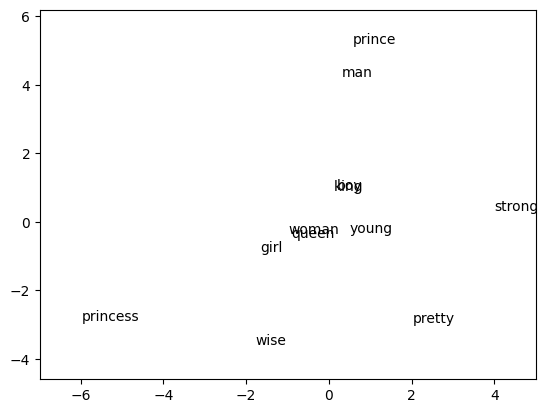

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()